# 插入排序

[点击此处查看完整效果](https://nbviewer.org/github/luog1992/pyAlgorithm/blob/master/sort_insertion.ipynb)

Refs:
- https://zhuanlan.zhihu.com/p/122293204

插入排序（Insertion sort）：
- 插入排序的工作原理是通过构建有序序列
- 对于未排序数据，在已排序序列中**从后向前**扫描，找到相应位置并插入
- 插入排序在实现上，通常采用in-place排序（即只需用到O(1)的额外空间的排序）
- 因而在从后向前扫描过程中，需要反复把已排序元素逐步向后挪位，为最新元素提供插入空间

![](https://raw.githubusercontent.com/luog1992/ipic/master/20211122005621.png)


- 空间复杂度：$O(1)$
- 排序方式：in-place
- 稳定性：稳定
- 时间复杂度：
    - min $O(n)$
    - max $O(n^2)$
    - avg $O(n^2)$


In [1]:
%run utils.ipynb

In [2]:
def insertion_sort_v1(items):
    """插入排序v2
    """
    data = []   # 绘图要用的数据
    len_ = len(items)

    # cursor 左侧的是已排序的部分，cursor及右侧是未排序的部分
    cursor = 0
    while cursor < len_:

        item_to_insert = items[cursor]
        item_insert_at = cursor      # 默认值

        # 从后往前扫描已排序部分，找到合适的插入位置
        tmp_idx = cursor - 1
        while tmp_idx >= 0:
            if items[tmp_idx] > item_to_insert:
                # 若 tmp_idx 处的元素 > item_to_insert，则左移
                items[tmp_idx + 1] = items[tmp_idx]
                data.append([tmp_idx + 1, tmp_idx, copy(items)])
                item_insert_at = tmp_idx
                tmp_idx -= 1
            else:
                break

        if item_insert_at != cursor:
            # 将 item_to_insert 插入到 item_insert_at 位置
            items[item_insert_at] = item_to_insert
            data.append([item_insert_at, cursor, copy(items)])

        cursor += 1

    return items, data

In [3]:
# run tests

test_sort_funtion(insertion_sort_v1)

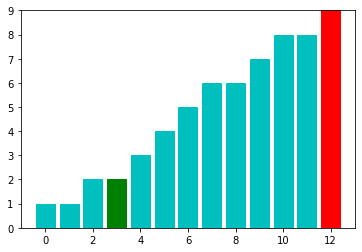

In [4]:
# draw sorting animation

HTML(make_sort_function_animation(insertion_sort_v1))

## 使用二分查找优化

上面的排序方式，每次从后往前找合适的位置的过程，可以使用二分查找的方式优化

In [5]:
def insertion_sort_v2(items):
    """插入排序v2
    """
    data = []   # 绘图要用的数据
    len_ = len(items)

    # cursor 左侧的是已排序的部分，cursor及右侧是未排序的部分
    cursor = 0
    while cursor < len_:

        item_to_insert = items[cursor]
        item_insert_at = cursor      # 默认值

        lo = 0
        hi = cursor
        exist = False
        while lo < hi:
            mid = lo + (hi - lo) // 2
            if items[mid] > item_to_insert:
                hi = mid
            elif items[mid] < item_to_insert:
                lo = mid + 1
            else:
                exist = True
                item_insert_at = mid
                break

        if not exist:
            item_insert_at = lo

        if item_insert_at != cursor:
            tmp_cursor = cursor
            # 将 item_insert_at ~ cursor 之间的位置整体左移一位
            while tmp_cursor > item_insert_at:
                items[tmp_cursor] = items[tmp_cursor - 1]
                data.append([tmp_cursor, tmp_cursor - 1, copy(items)])
                tmp_cursor -= 1

            # 将 item_to_insert 插入到 item_insert_at 位置
            items[item_insert_at] = item_to_insert
            data.append([item_insert_at, cursor, copy(items)])

        cursor += 1

    return items, data

In [6]:
# run tests

test_sort_funtion(insertion_sort_v2)

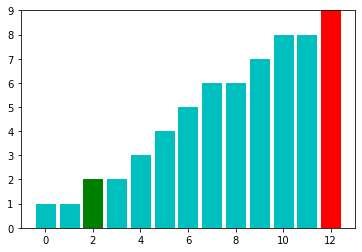

In [7]:
# draw animation

HTML(make_sort_function_animation(insertion_sort_v2))